# Comparing human and LLM scale correlations

- load both datasets
- produce corr dfs for both datasets
- build scatter plot of corr data 

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data (DV level)
human_DV_level_data = pd.read_csv("human_data_analysis/human_data/human_DV_data/final_DVs_humans.csv")
LLM_DV_level_data = pd.read_csv("processed_data/final_DVs.csv")

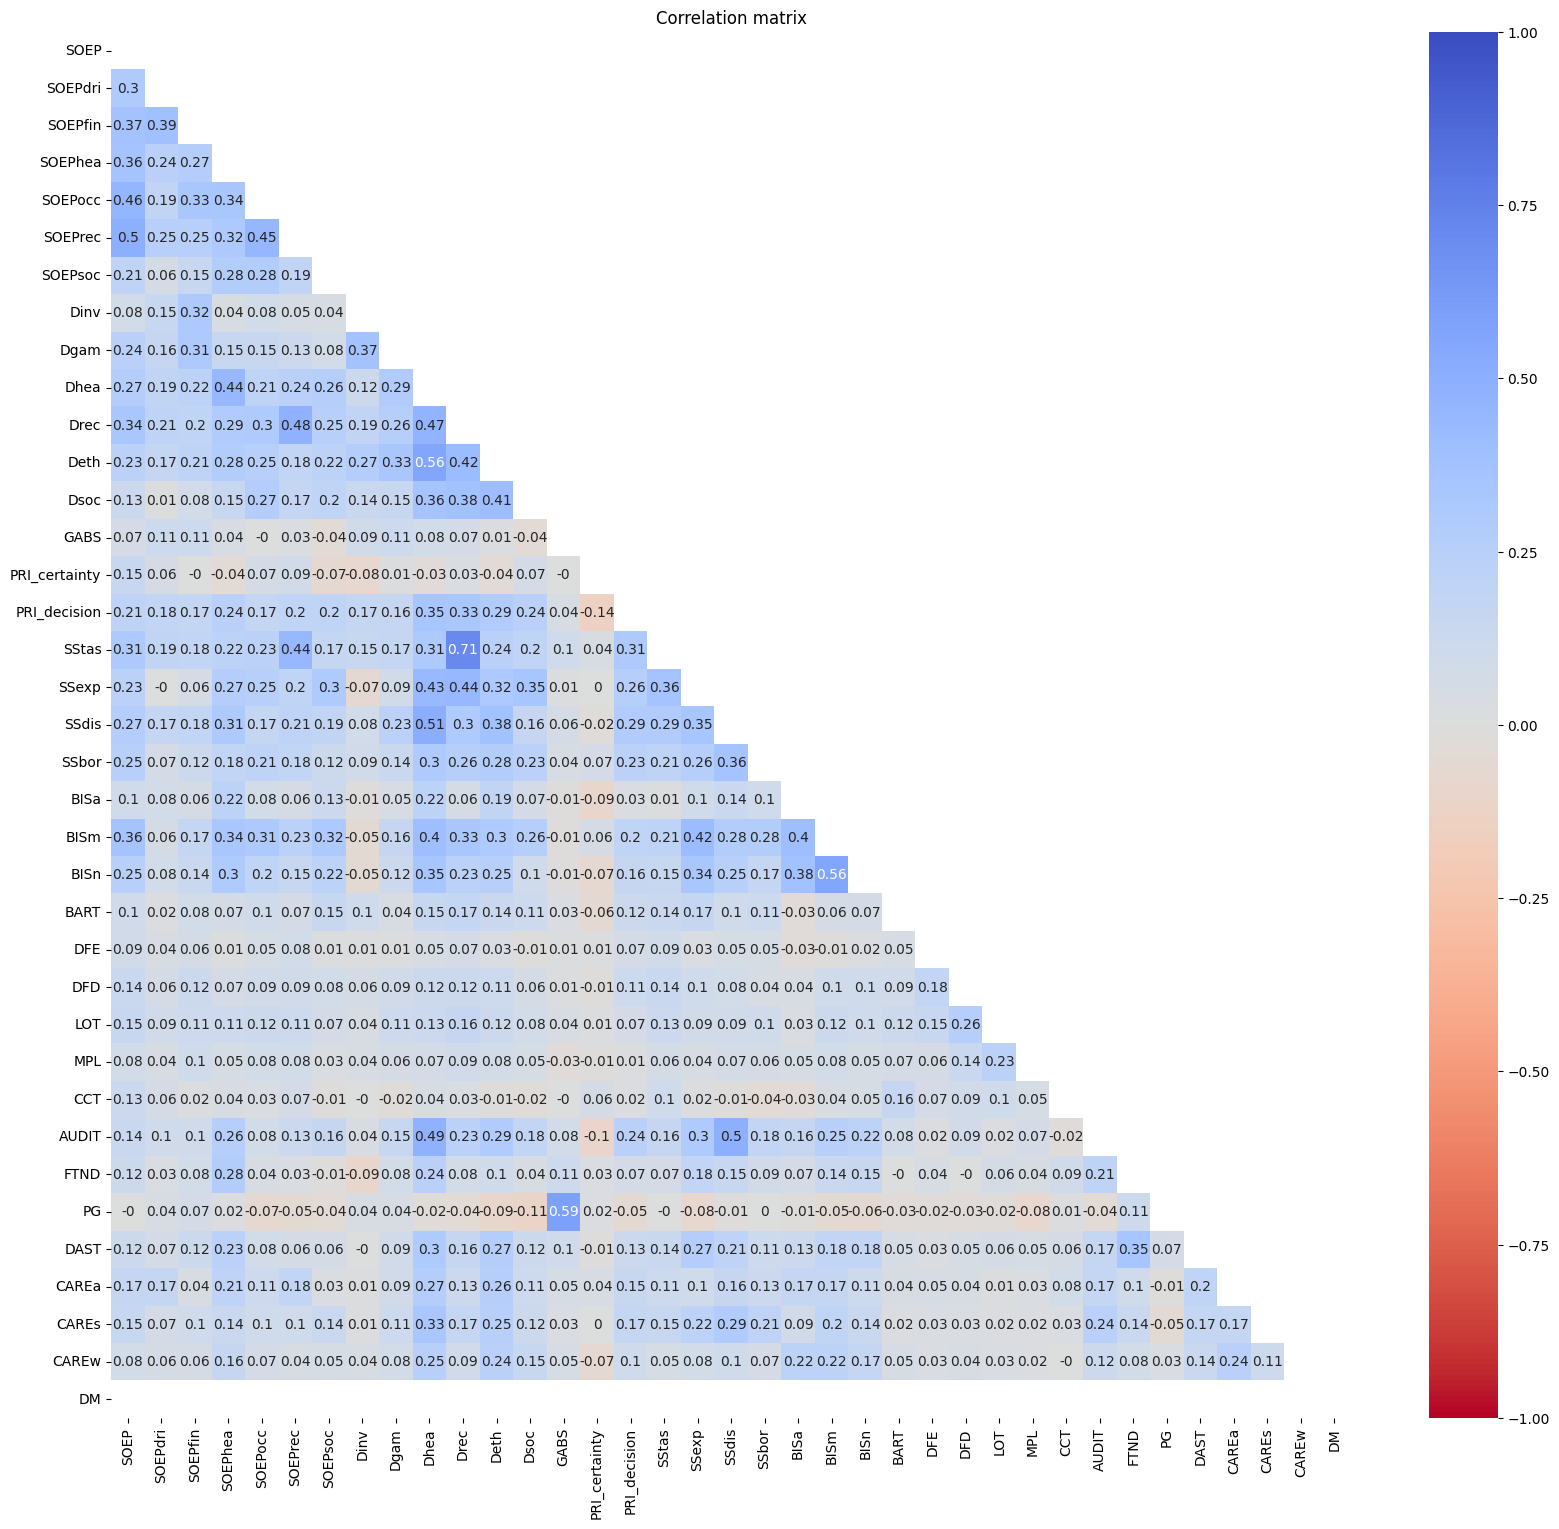

In [2]:
# human data to corr df

# Compute correlation matrix (only for numeric columns)
numeric_df_human = human_DV_level_data.drop(columns=['partid'])
corr_human = numeric_df_human.corr()

# reorder to compare with human data
order = ['SOEP', 'SOEPdri', 'SOEPfin', 'SOEPhea', 'SOEPocc', 'SOEPrec', 'SOEPsoc',
        'Dinv', 'Dgam', 'Dhea', 'Drec', 'Deth', 'Dsoc', 'GABS', 'PRI_certainty', 'PRI_decision', 
        'SStas', 'SSexp', 'SSdis', 'SSbor', 'BISa', 'BISm', 'BISn', 'BART', 'DFE', 'DFD', 'LOT', 'MPL', 'CCT', 
         'AUDIT', 'FTND', 'PG', 'DAST', 'CAREa', 'CAREs', 'CAREw', 'DM']  

corr_reordered = corr_human.loc[order, order].round(2)


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_reordered, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_reordered,
    mask=mask,
    annot=True,
    cmap="coolwarm_r",
    vmin=-1,
    vmax=1
)
plt.title("Correlation matrix")
plt.show()



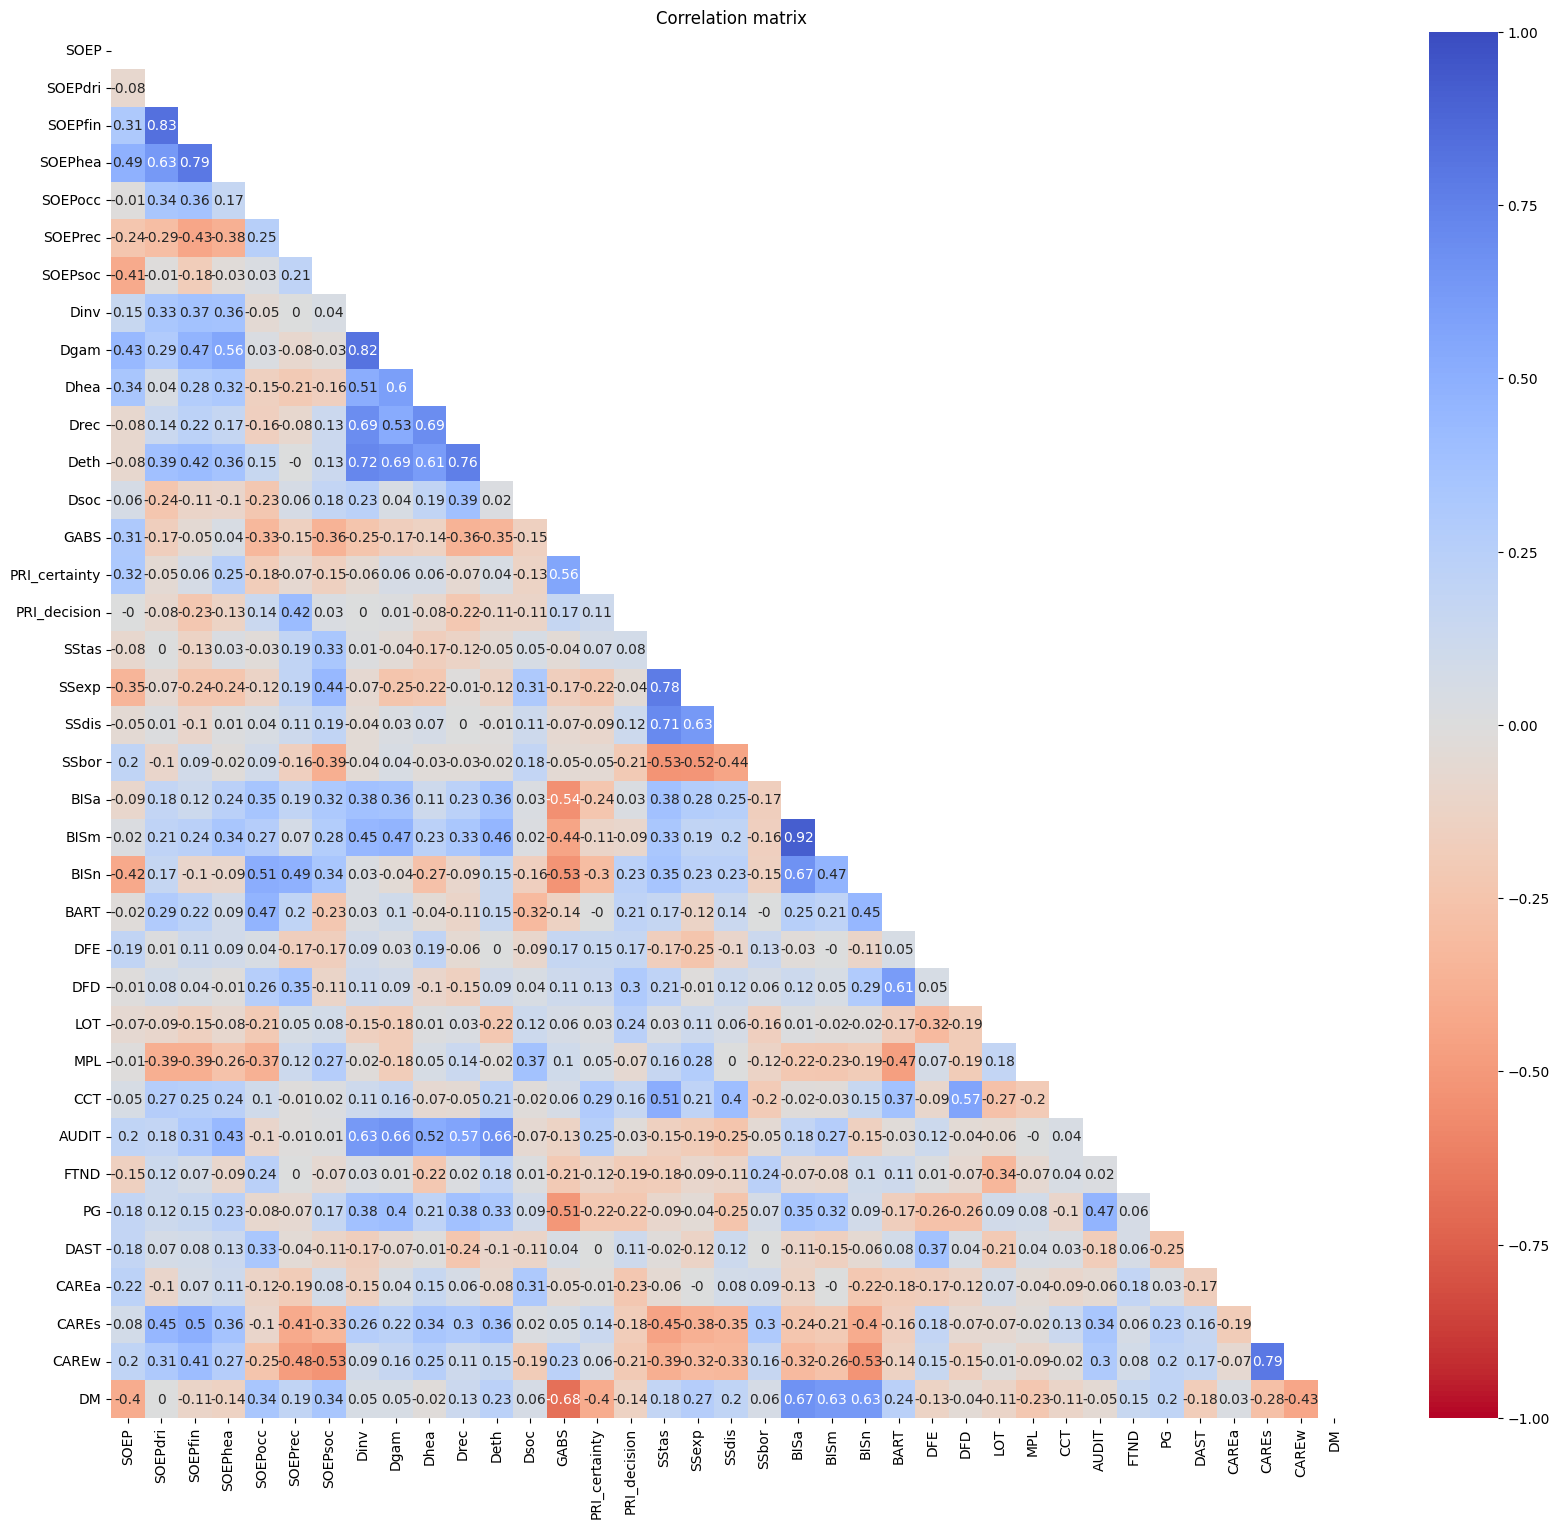

In [3]:
# LLM data to corr df

# Compute correlation matrix (only for numeric columns)
numeric_df_LLM = LLM_DV_level_data.drop(columns=['model'])
corr_LLM = numeric_df_LLM.corr()

# reorder to compare with human data
order = ['SOEP', 'SOEPdri', 'SOEPfin', 'SOEPhea', 'SOEPocc', 'SOEPrec', 'SOEPsoc',
        'Dinv', 'Dgam', 'Dhea', 'Drec', 'Deth', 'Dsoc', 'GABS', 'PRI_certainty', 'PRI_decision', 
        'SStas', 'SSexp', 'SSdis', 'SSbor', 'BISa', 'BISm', 'BISn', 'BART', 'DFE', 'DFD', 'LOT', 'MPL', 'CCT', 
         'AUDIT', 'FTND', 'PG', 'DAST', 'CAREa', 'CAREs', 'CAREw', 'DM']  

corr_reordered = corr_LLM.loc[order, order].round(2)


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_reordered, dtype=bool))

# Plot heatmap with mask
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_reordered,
    mask=mask,
    annot=True,
    cmap="coolwarm_r",
    vmin=-1,
    vmax=1
)
plt.title("Correlation matrix")
plt.show()


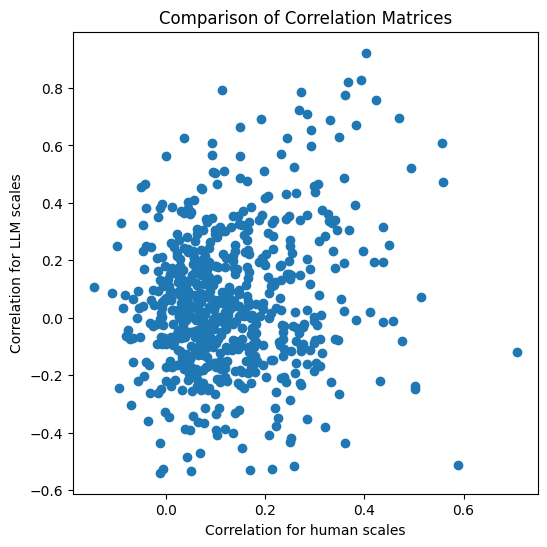

In [ ]:
# Extract the upper triangle without the diagonal
mask = np.triu(np.ones(corr_human.shape), k=1).astype(bool)

vals_human = corr_human.where(mask).stack()
vals_LLM = corr_LLM.where(mask).stack()

# Make sure indexing aligns
vals_human, vals_LLM = vals_human.align(vals_LLM)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(vals_human, vals_LLM)
plt.xlabel("Correlation for human scales")
plt.ylabel("Correlation for LLM scales")
plt.title("Comparison of Correlation Matrices")

plt.show()


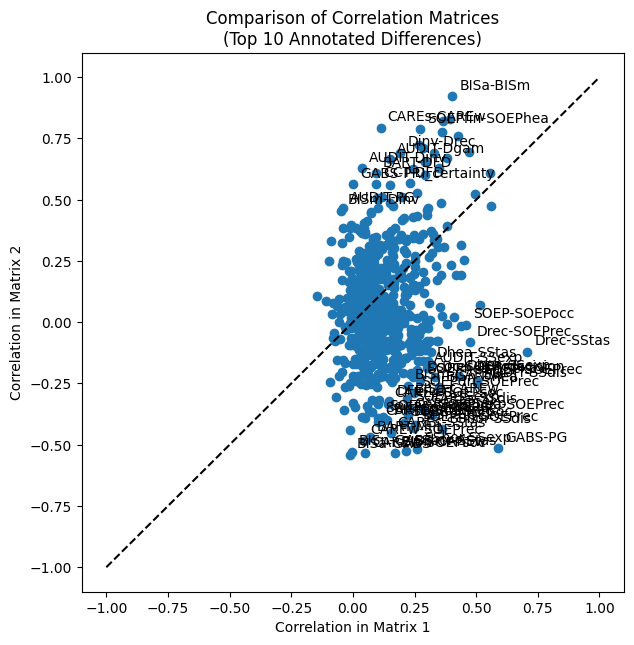

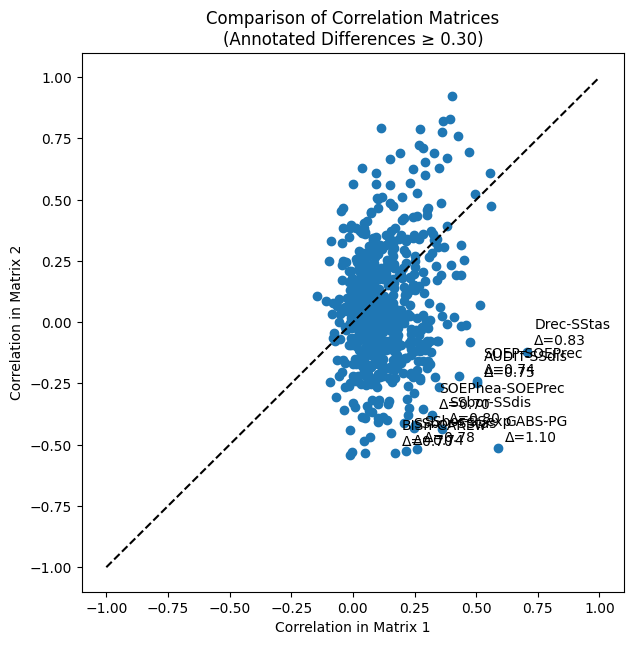

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# After computing vals_human and vals_LLM as before:
diff = (vals_human - vals_LLM).abs()
top_k = diff.nlargest(50)

plt.figure(figsize=(7,7))
plt.scatter(vals_human, vals_LLM)

# Plot identity line
plt.plot([-1,1], [-1,1], "k--")

plt.xlabel("Correlation in Matrix 1")
plt.ylabel("Correlation in Matrix 2")
plt.title("Comparison of Correlation Matrices\n(Top 10 Annotated Differences)")

# Annotate the biggest mismatches
for (var1, var2), _ in top_k.items():
    x = vals_human.loc[(var1, var2)]
    y = vals_LLM.loc[(var1, var2)]
    plt.annotate(f"{var1}-{var2}", (x, y), textcoords="offset points", xytext=(5, 5))

plt.show()

threshold = 0.7 # annotate differences >= 0.3

big_diffs = diff[diff >= threshold]

plt.figure(figsize=(7,7))
plt.scatter(vals_human, vals_LLM)
plt.plot([-1,1], [-1,1], "k--")

for (v1, v2), d in big_diffs.items():
    x = vals_human.loc[(v1, v2)]
    y = vals_LLM.loc[(v1, v2)]
    plt.annotate(f"{v1}-{v2}\nΔ={d:.2f}",
                 (x, y),
                 textcoords="offset points",
                 xytext=(5,5))

plt.xlabel("Correlation in Matrix 1")
plt.ylabel("Correlation in Matrix 2")
plt.title("Comparison of Correlation Matrices\n(Annotated Differences ≥ 0.30)")
plt.show()


In [7]:
# Pearson Correlation
similarity = np.corrcoef(vals_human, vals_LLM)[0, 1]
print("Matrix similarity:", similarity)


Matrix similarity: nan
